# BAIXANDO O DATASET

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!gdown 1EfYiRv3ZmrW6pFTFSHLHwYLOlMTpJTsT

Downloading...
From (original): https://drive.google.com/uc?id=1EfYiRv3ZmrW6pFTFSHLHwYLOlMTpJTsT
From (redirected): https://drive.google.com/uc?id=1EfYiRv3ZmrW6pFTFSHLHwYLOlMTpJTsT&confirm=t&uuid=678fb89a-aee1-4f85-a877-ca1b60ba5c55
To: /content/dataset.zip
100% 109M/109M [00:01<00:00, 73.9MB/s]


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/ARARA-AZUL/
  inflating: dataset/ARARA-AZUL/istockphoto-1006235376-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1008495474-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1015804962-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1022259024-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1023638574-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1025300302-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1027555546-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1032694086-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1041146702-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1043212752-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1043936538-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-104699178-612x612.jpg  
  inflating: dataset/ARARA-AZUL/istockphoto-1047989278-612x612.jpg  
  inflating: dataset/ARARA-

In [ ]:
caminho_pasta = 'dataset/'

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    caminho_pasta,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='training')

Found 1830 images belonging to 4 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    caminho_pasta,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='validation')

Found 455 images belonging to 4 classes.


# TRANSFER LEARNING

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Input

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='softmax')(x)

In [ ]:
transfer_model = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
transfer_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

Epoch 1/50
91/91 [==============================] - 33s 264ms/step - loss: 1.1885 - accuracy: 0.7680 - val_loss: 0.2491 - val_accuracy: 0.8977
Epoch 2/50
91/91 [==============================] - 17s 185ms/step - loss: 0.2227 - accuracy: 0.9155 - val_loss: 0.2151 - val_accuracy: 0.9114
Epoch 3/50
91/91 [==============================] - 18s 194ms/step - loss: 0.1477 - accuracy: 0.9486 - val_loss: 0.2445 - val_accuracy: 0.9136
Epoch 4/50
91/91 [==============================] - 18s 196ms/step - loss: 0.1202 - accuracy: 0.9547 - val_loss: 0.1772 - val_accuracy: 0.9318
Epoch 5/50
91/91 [==============================] - 17s 185ms/step - loss: 0.0952 - accuracy: 0.9707 - val_loss: 0.2034 - val_accuracy: 0.9295
Epoch 6/50
91/91 [==============================] - 19s 211ms/step - loss: 0.0796 - accuracy: 0.9680 - val_loss: 0.2337 - val_accuracy: 0.9205
Epoch 7/50
91/91 [==============================] - 17s 190ms/step - loss: 0.0595 - accuracy: 0.9801 - val_loss: 0.2749 - val_accuracy: 0.9091

In [ ]:
val_loss, val_accuracy = transfer_model.evaluate(
    validation_generator,
    steps=validation_generator.samples // validation_generator.batch_size
)

print(f"Perda de validação: {val_loss:.2f}")
print(f"Precisão de validação: {val_accuracy * 100:.2f}%")

22/22 [==============================] - 4s 153ms/step - loss: 0.3332 - accuracy: 0.9273
Perda de validação: 0.33
Precisão de validação: 92.73%




# SALVANDO MODELO

In [ ]:
from google.colab import drive
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transfer_model.save('/content/drive/My Drive/models/IAA-TRANSFER-LEARNING-01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# CARREGANDO MODELO E REALIZANDO A PREDIÇÃO

In [ ]:
loaded_model = load_model('/content/drive/My Drive/models/IAA-TRANSFER-LEARNING-01.h5')

In [ ]:
validation_generator.reset()
for x_batch, y_batch in validation_generator:
    image_data = x_batch[4]
    break

1/1 [==============================] - 0s 19ms/step
Predição:  ARARA-AZUL


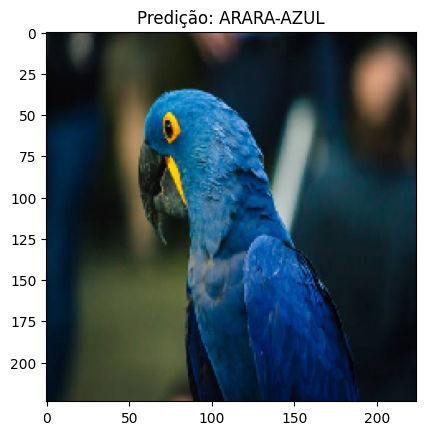

In [ ]:
prediction = loaded_model.predict(np.expand_dims(image_data, axis=0))

class_names = ['ARARA-AZUL', 'ARIRANHA', 'MICO-LEÃO-DOURADO', 'ONÇA-PINTADA']

predicted_class_index = np.argmax(prediction)

predicted_class = class_names[predicted_class_index]

print("Predição: ", predicted_class)

plt.imshow(image.array_to_img(image_data))
plt.title(f'Predição: {predicted_class}')
plt.show()

# ANÁLISE DOS RESULTADOS (RELATÓRIO)

Os resultados obtidos podem ser resumidos em duas partes: Resultados Quantitativos (acurácia do modelo) e Resultados Qualitativos (imagens e predições feitas pelo modelo).

- Resultados Quantitativos:
1. O modelo alcançou uma precisão de validação de aproximadamente 93% após realizar 50 épocas de treinamento. Isso significa que o modelo é capaz de classificar corretamente a maioria das imagens no conjunto de validação.
2. A acurácia deste modelo é alta por alguns motivos, um deles é por ser um modelo de transfer learning, modelos pré treinados que já temos como base. Simplesmente prontos. O modelo aqui usado foi o VGG19, aplicação do Keras.
3. É possível que erros possam acontecer na predição (a imagem mostrada não condizer com a predição feita), a acurácia não é de 100%, mas a chance de erros segundo os números é baixa.

- Resultados Qualitativos:
1. Ao observar as imagens que temos como resposta e as predições feitas, podemos ver como o modelo está se saindo em termos de classificação. No último resultado salvo, podemos ver que a imagem que é mostrada condiz com a predição realizada pelo modelo, ou seja, faz uma predição acertiva sobre qual classe ela pertence. Apresentou uma Arara-Azul e a predição foi uma Arara-Azul.
2. Em resumo, o modelo treinado apresenta um desempenho considerado ótimo, levando em conta sua porcentagem de precisão de validação.